# SUPERVISED LEARNING

In [29]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [30]:
X, y, = datasets.load_iris(return_X_y=True)

Supervised learning is that in which we have labels available for the dataset.

In supervised learning exists the possibility of evaluating the model in order to know how well it performs predictions.

If we want to be able to do this we need to split the dataset in two subgroups, one for training the model and one to test the results.

**Why do we do this?** If we don't train and test our model we risk overfitting the model to our current dataset thus, failing to predict data from outside our sample.

In [31]:
from sklearn.model_selection import train_test_split #this is the function

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

# ALWAYS USE STRATIFY
# this parameter distributes evenly the labels between train and test datasets
# f.e.: in fraud detection 1 of each 100k transactions is fraudulent, this is so low that we might distribute them unevenly if we dont specify this.

In [33]:
X, y = datasets.load_boston(return_X_y=True)
datasets.load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [34]:
print(datasets.load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
df = pd.DataFrame(X, columns=datasets.load_boston()['feature_names'])
df['y'] = y
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [36]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(2)

/tmp/ipykernel_1981/2199127217.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1).set_precision(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

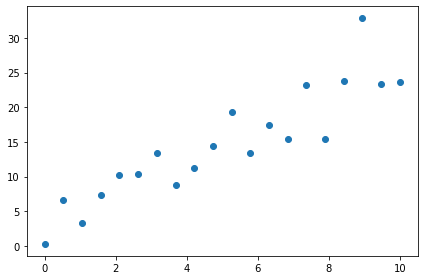

In [38]:
from sklearn.linear_model import LinearRegression
slope = 2
intercept = 4
X_fake_lin = np.linspace(0, 10, num=20)
y_fake_lin = X_fake_lin * slope + intercept + np.random.normal(.3, 3, size=20)


fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_lin, y_fake_lin)
plt.tight_layout()

In [39]:
lr = LinearRegression()
lr.fit(X_fake_lin.reshape(-1, 1), y_fake_lin)
lr.coef_, lr.intercept_

(array([2.32564704]), 3.053401622309268)

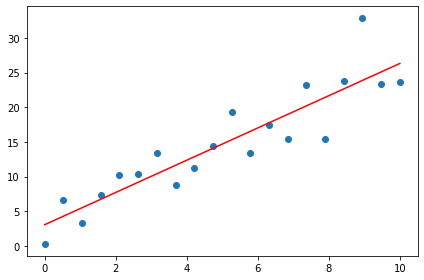

In [40]:
y_pred = lr.predict(X_fake_lin.reshape(-1, 1))

fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_lin, y_fake_lin)
ax.plot(X_fake_lin.reshape(-1, 1), y_pred, 'r')
plt.tight_layout()

In [41]:
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression


scores_sfs = []

for i in range(1, X_train.shape[1]):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(
                        estimator=lr, n_features_to_select=i, direction='forward', scoring='r2')
    sfs.fit(X_train,  y_train)
    lr.fit(X_train[:, sfs.support_], y_train)
    scores_sfs.append(lr.score(X_test[:, sfs.support_], y_test))

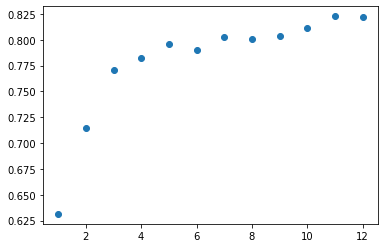

In [42]:
fig, ax = plt.subplots()
ax.scatter(range(1, X_train.shape[1]), scores_sfs)

In [43]:
for i in range(1, 6):
    lr = LinearRegression()
    sfs = feature_selection.SequentialFeatureSelector(estimator=lr, n_features_to_select=i, direction='backward', scoring='r2')
    sfs.fit(X_train, y_train)
    print(datasets.load_boston()['feature_names'][sfs.support_])

['LSTAT']
['RM' 'LSTAT']
['RM' 'PTRATIO' 'LSTAT']
['RM' 'DIS' 'PTRATIO' 'LSTAT']
['NOX' 'RM' 'DIS' 'PTRATIO' 'LSTAT']


## Decision Trees

In [44]:
from sklearn.tree import DecisionTreeRegressor

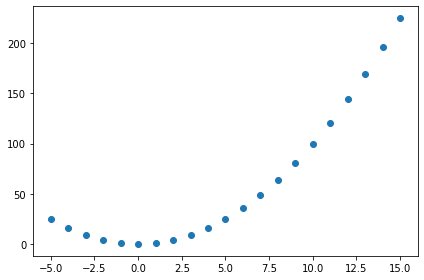

In [45]:
X_fake = np.linspace(-5, 15, num=21)
y_fake = X_fake ** 2
fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake, y_fake)
plt.tight_layout()

In [46]:
dt = DecisionTreeRegressor()
dt.fit(X_fake.reshape(-1, 1), y_fake)
y_pred = dt.predict(X_fake.reshape(-1, 1))

In [47]:
dt.score(X_fake.reshape(-1, 1), y_fake)

1.0

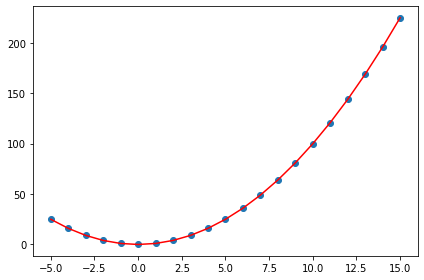

In [48]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake, y_fake)
ax.plot(X_fake, y_pred, 'r')
plt.tight_layout()

This is a clear example of _OVERFITTING_, the decision tree is making one leaf for each point so it predicts it too accurately.

We can control OVER and UNDERfitting with max_depth and max_leaf hyperparams.

Normally, limiting number of leaves is better than limitting depth, because decision trees can branch out a lot while not generating a lot of leaves.

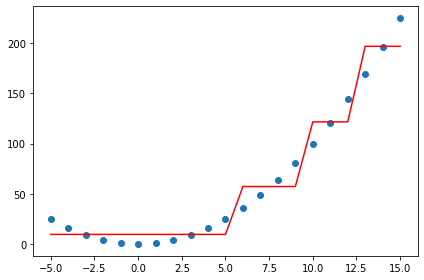

In [49]:
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_fake.reshape(-1, 1), y_fake)
y_pred = dt.predict(X_fake.reshape(-1, 1))

fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake, y_fake)
ax.plot(X_fake, y_pred, 'r')
plt.tight_layout()

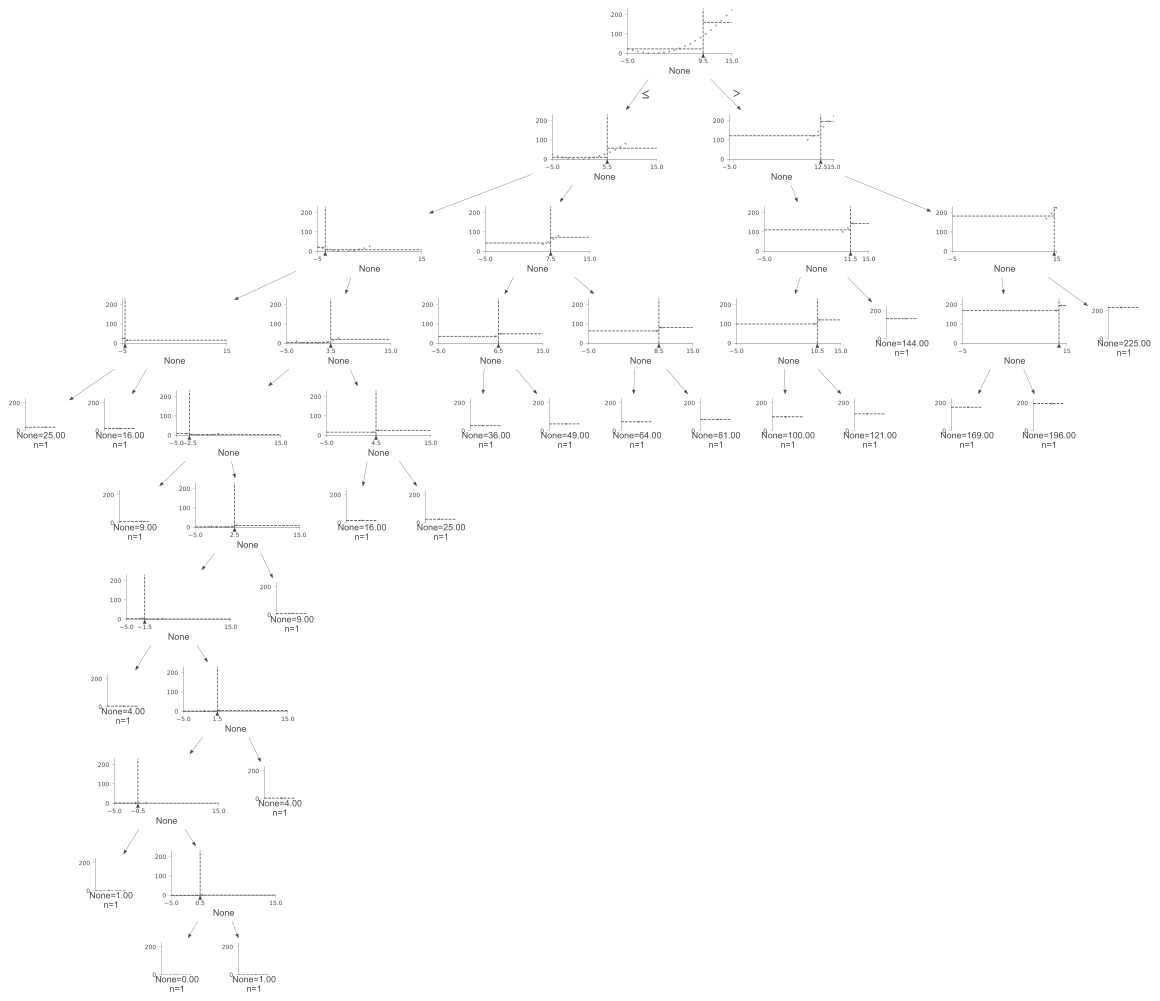

In [ ]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(dt, X_fake.reshape(-1, 1), y_fake)
viz

In [51]:
X_fake.shape

(21,)

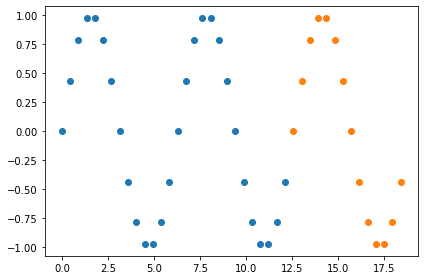

In [53]:
import math

X_fake_sin = np.linspace(0, math.pi * 6, num=43)[:-1]
y_fake_sin = np.sin(X_fake_sin)

X_fake_sin_train, X_fake_sin_test, y_fake_sin_train, y_fake_sin_test = train_test_split(X_fake_sin, y_fake_sin, test_size=.31, shuffle=False)

fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test)
plt.tight_layout()

In [54]:
dt = DecisionTreeRegressor()
dt.fit(X_fake_sin_train.reshape(-1, 1), y_fake_sin_train)
y_pred = dt.predict(X_fake_sin_test.reshape(-1, 1))

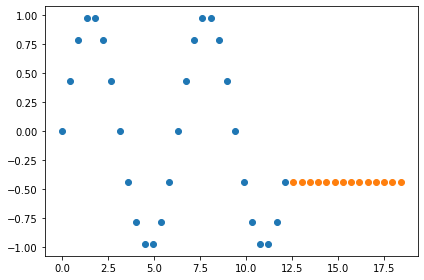

In [55]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_pred)
plt.tight_layout()

Here we can see that how Decision trees behave when infering future values.

They are completely useless to predict values out of the range we have available for training.

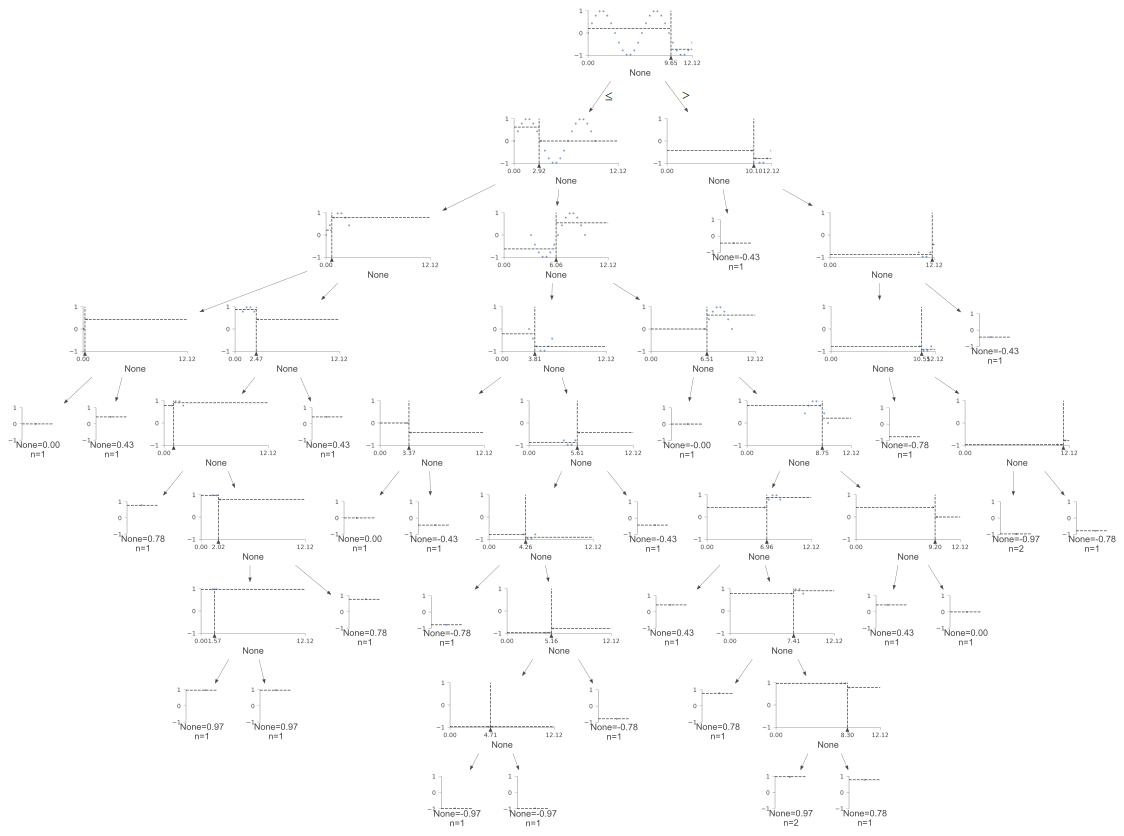

In [ ]:
viz = dtreeviz(dt, X_fake_sin_train.reshape(-1, 1), y_fake_sin_train)
viz

In [74]:
X_fake_lin_train, X_fake_lin_test, y_fake_lin_train, y_fake_lin_test = train_test_split(X_fake_lin, y_fake_lin, test_size=.31, shuffle=False)

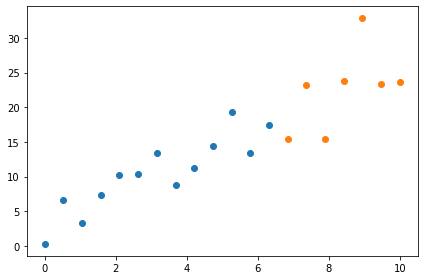

In [75]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_lin_train, y_fake_lin_train)
ax.scatter(X_fake_lin_test, y_fake_lin_test)
plt.tight_layout()

In [76]:
dt = DecisionTreeRegressor()
dt.fit(X_fake_lin_train.reshape(-1, 1), y_fake_lin_train)
y_pred = dt.predict(X_fake_lin_test.reshape(-1, 1))

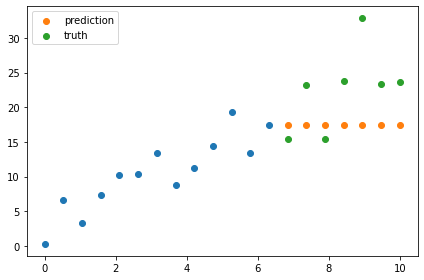

In [77]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_lin_train, y_fake_lin_train)
ax.scatter(X_fake_lin_test, y_pred, label='prediction')
ax.scatter(X_fake_lin_test, y_fake_lin_test, label='truth')
ax.legend()
plt.tight_layout()

We can tune decision trees in order to make them learn seasonality.

In [79]:
np.array(range(X_fake_sin.shape[0])) % 14

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13])

In [80]:
X_trick_train = np.vstack([X_fake_sin_train, np.array(range(X_fake_sin_train.shape[0])) % 14]).T
X_trick_test = np.vstack([X_fake_sin_test, np.array(range(X_fake_sin_test.shape[0])) % 14]).T

In [82]:
X_trick_test

array([[12.56637061,  0.        ],
       [13.01516956,  1.        ],
       [13.46396852,  2.        ],
       [13.91276747,  3.        ],
       [14.36156642,  4.        ],
       [14.81036537,  5.        ],
       [15.25916432,  6.        ],
       [15.70796327,  7.        ],
       [16.15676222,  8.        ],
       [16.60556117,  9.        ],
       [17.05436012, 10.        ],
       [17.50315907, 11.        ],
       [17.95195802, 12.        ],
       [18.40075697, 13.        ]])

Now each point has its seasonality parameter attached to its value.

In [83]:
dt = DecisionTreeRegressor()
dt.fit(X_trick_train, y_fake_sin_train)
y_pred = dt.predict(X_trick_test)

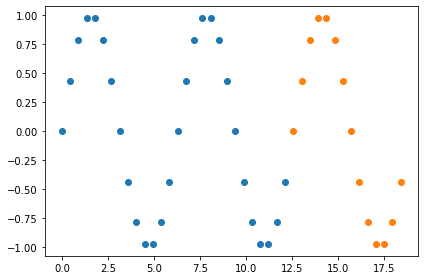

In [84]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_pred)
plt.tight_layout()

In [85]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [86]:
dt.score(X_test, y_test)

0.7271488641054656

In [87]:
for i in range(1, 6):
    dt = DecisionTreeRegressor()
    sfs = feature_selection.SequentialFeatureSelector(estimator=dt, n_features_to_select=i, direction='backward', scoring='r2')
    sfs.fit(X_train, y_train)
    print(datasets.load_boston()['feature_names'][sfs.support_])

['NOX']
['RM' 'LSTAT']
['RM' 'TAX' 'LSTAT']
['NOX' 'RM' 'PTRATIO' 'LSTAT']
['ZN' 'NOX' 'RM' 'PTRATIO' 'LSTAT']


In [88]:
dt = DecisionTreeRegressor()
sfs = feature_selection.SequentialFeatureSelector(estimator=dt, n_features_to_select=1, direction='backward', scoring='r2')
sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=DecisionTreeRegressor(),
                          n_features_to_select=1, scoring='r2')

In [89]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train[:, sfs.support_], y_train)
y_pred_train = dt.predict(X_train[:, sfs.support_])
y_pred_test = dt.predict(X_test[:, sfs.support_])

In [90]:
dt.score(X_test[:, sfs.support_], y_test)

0.7618256549113516

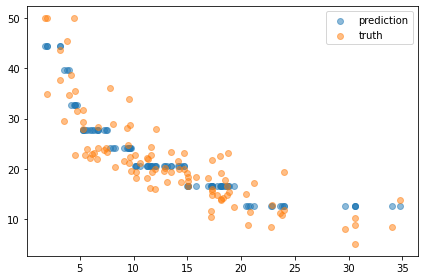

In [91]:
fig, ax = plt.subplots(1, 1)
#ax.scatter(X_train[:, sfs.support_], y_train)
ax.scatter(X_test[:, sfs.support_], y_pred_test, label='prediction', alpha=.5)
ax.scatter(X_test[:, sfs.support_], y_test, label='truth', alpha=.5)
ax.legend()
plt.tight_layout()

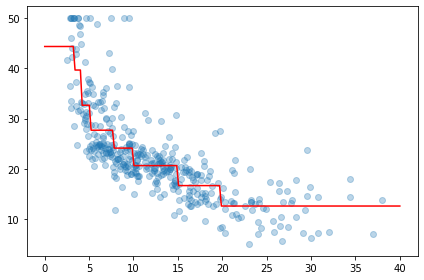

In [92]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_train[:, sfs.support_], y_train, alpha=.3)
ax.plot(np.linspace(.0, 40., 200), dt.predict(np.linspace(0, 40, 200).reshape(-1, 1)), 'r')
plt.tight_layout()

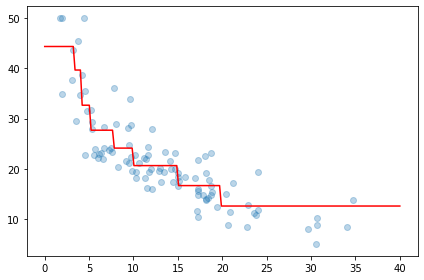

In [93]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X_test[:, sfs.support_], y_test, alpha=.3)
ax.plot(np.linspace(.0, 40., 200), dt.predict(np.linspace(0, 40, 200).reshape(-1, 1)), 'r')
plt.tight_layout()

## GRID SEARCH

In [94]:
from sklearn import model_selection

In [95]:
dt = DecisionTreeRegressor()
gs = model_selection.GridSearchCV(
    dt,
    {'min_samples_leaf': [1, 2, 3, 5, 8, 15],
     'max_depth': [2, 4, 8, 12, 16, 20, 40, 60]},
    scoring='r2',
    cv=5,
    n_jobs=-1)
gs.fit(X_train[:, sfs.support_], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 8, 12, 16, 20, 40, 60],
                         'min_samples_leaf': [1, 2, 3, 5, 8, 15]},
             scoring='r2')

In [96]:
gs.best_params_

{'max_depth': 4, 'min_samples_leaf': 15}

In [125]:
pd.DataFrame(gs.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000842,0.000057,0.001306,0.000141,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.340045,0.260191,0.520413,0.373550,0.108845,13
1,0.000552,0.000040,0.000964,0.000135,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.340045,0.260191,0.520413,0.373550,0.108845,13
2,0.000749,0.000205,0.000985,0.000148,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.384408,0.417736,0.554182,0.452108,0.073448,10
3,0.000539,0.000131,0.000924,0.000094,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.402693,0.450512,0.577134,0.476780,0.073598,7
4,0.000505,0.000169,0.000955,0.000239,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.457464,0.492719,0.613170,0.521117,0.066663,4


There are other methods similar to Grid search like Random Search

In [126]:
model_selection.RandomizedSearchCV

sklearn.model_selection._search.RandomizedSearchCV

## K-Nearest Neighbors

In [127]:
from sklearn.neighbors import KNeighborsRegressor

In [128]:
kn = KNeighborsRegressor()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.9184

In [129]:
kn = KNeighborsRegressor()
gs = model_selection.GridSearchCV(
    kn,
    param_grid={'n_neighbors': [1, 2, 3, 5, 7, 10, 12],
                'weights': ['uniform', 'distance']},
    scoring='r2',
    cv=3,
    n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 10, 12],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [130]:
gs.best_params_

{'n_neighbors': 12, 'weights': 'uniform'}

In [131]:
gs.best_estimator_.score(X_test, y_test)

0.9180555555555555

## Neural Networks (introduction)

Neural networks consist on layers o "neurons" that receive inputs, process them with a processing function and give outputs.

Every parameter we want to ingest into the neural network would be a neuron of the first layer, or input layer.

Every prediction is a neuron of the last layer or output layer.

Layers between these two, are the processing layers and they are in  charge of the operations and convergence of hte solution.

Neural Networks, when fine tuned, are almost always better than algorithms, but the processing is much greater, making them costly to run.

In [132]:
from sklearn.neural_network import MLPRegressor

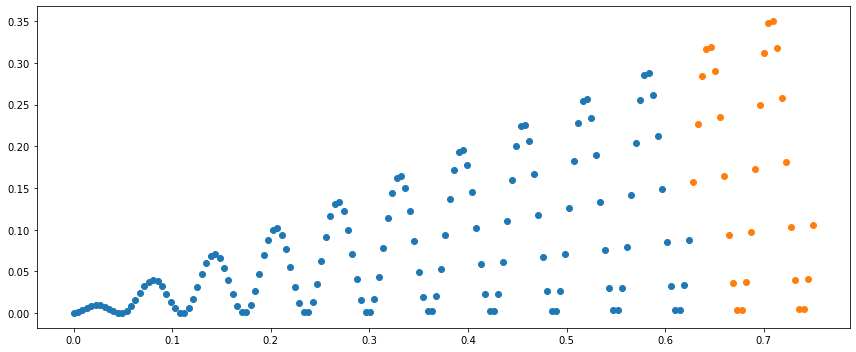

In [133]:
X_fake_sin = np.linspace(0, math.pi * 24, num=169)[:-1]
y_fake_sin = (np.sin(X_fake_sin) + 1) * X_fake_sin * .2 #+ X_fake_sin * .1
X_fake_sin /= 100
y_fake_sin /= 80

X_fake_sin_train, X_fake_sin_test, y_fake_sin_train, y_fake_sin_test = train_test_split(X_fake_sin, y_fake_sin, test_size=.165, shuffle=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test)
plt.tight_layout()

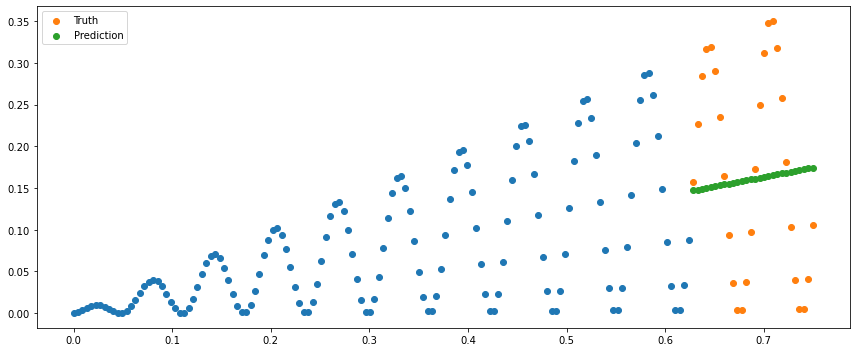

In [134]:
lr = LinearRegression()
lr.fit(X_fake_sin_train.reshape(-1, 1), y_fake_sin_train.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test, label='Truth')
ax.scatter(X_fake_sin_test, lr.predict(X_fake_sin_test.reshape(-1, 1)), label='Prediction')
ax.legend()
plt.tight_layout()

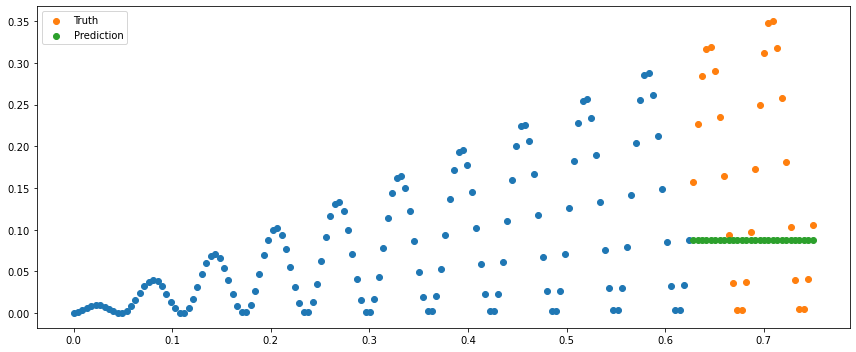

In [135]:
dt = DecisionTreeRegressor()
dt.fit(X_fake_sin_train.reshape(-1, 1), y_fake_sin_train.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test, label='Truth')
ax.scatter(X_fake_sin_test, dt.predict(X_fake_sin_test.reshape(-1, 1)), label='Prediction')
ax.legend()
plt.tight_layout()

In [136]:
X_train_stat = np.hstack([X_fake_sin_train.reshape(-1, 1), np.array([i % 28 for i in range(X_fake_sin_train.size)]).reshape(-1, 1)])
X_test_stat = np.hstack([X_fake_sin_test.reshape(-1, 1), np.array([i % 28 for i in range(X_fake_sin_test.size)]).reshape(-1, 1)])

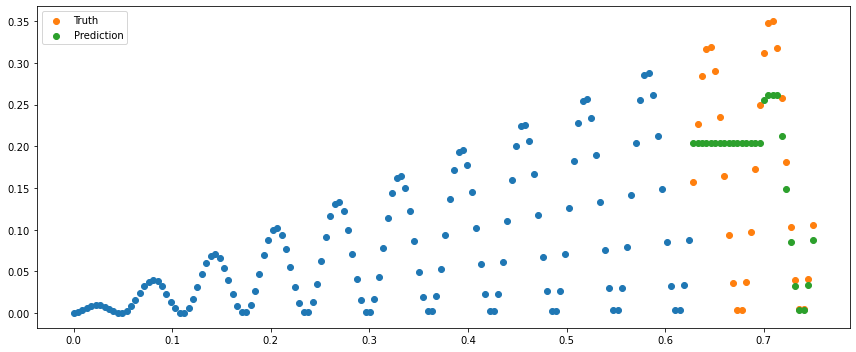

In [137]:
dt = DecisionTreeRegressor(max_depth=16)
dt.fit(X_train_stat, y_fake_sin_train.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test, label='Truth')
ax.scatter(X_fake_sin_test, dt.predict(X_test_stat), label='Prediction')
ax.legend()
plt.tight_layout()

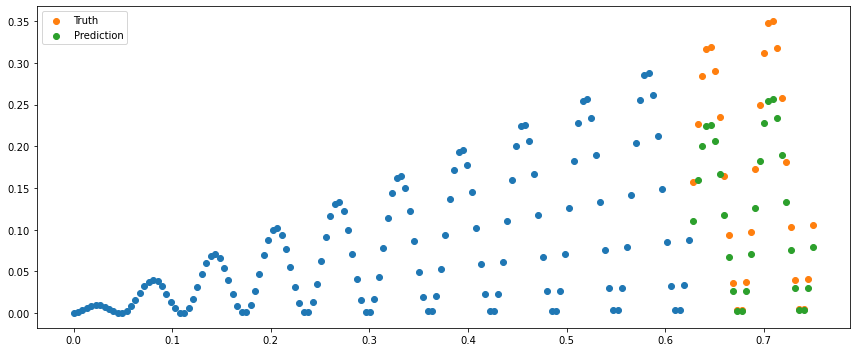

In [138]:
kn = KNeighborsRegressor(n_neighbors=2)
kn.fit(X_train_stat, y_fake_sin_train.reshape(-1, 1))

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test, label='Truth')
ax.scatter(X_fake_sin_test, kn.predict(X_test_stat), label='Prediction')
ax.legend()
plt.tight_layout()

In [139]:
X_nn = []
y_nn = []
for i in range(0, X_fake_sin_train.size - 28):
    X_nn.append(np.append(X_fake_sin_train[i:i+28], [(i % 28) / 28]))
    y_nn.append(y_fake_sin_train[i:i+28])
X_nn = np.array(X_nn)
y_nn = np.array(y_nn)

In [140]:
X_nn.shape

(112, 29)

In [141]:
nn = MLPRegressor(random_state=1, activation='tanh', max_iter=10000, hidden_layer_sizes=(29,) * 4, learning_rate='adaptive', learning_rate_init=.009, n_iter_no_change=10000)
nn.fit(X_nn, y_nn)
nn.predict(np.append(X_fake_sin_test, [0]).reshape(1, -1))

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[ 0.18033899,  0.24110424,  0.28815033,  0.29489637,  0.28411828,
         0.24123591,  0.16779052,  0.1025091 ,  0.03982937, -0.002802  ,
        -0.0097852 ,  0.01186222,  0.06804066,  0.13422434,  0.21418956,
         0.27155838,  0.31412793,  0.32508783,  0.30872824,  0.25210101,
         0.18972399,  0.10454959,  0.0441074 , -0.00489676, -0.00674275,
         0.01906712,  0.08411276,  0.15899993]])

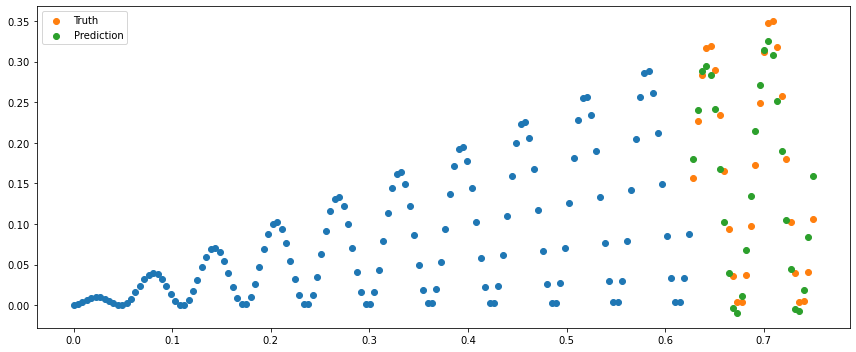

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.scatter(X_fake_sin_train, y_fake_sin_train)
ax.scatter(X_fake_sin_test, y_fake_sin_test, label='Truth')
ax.scatter(X_fake_sin_test, nn.predict(np.append(X_fake_sin_test, [0]).reshape(1, -1)), label='Prediction')
ax.legend()
plt.tight_layout()

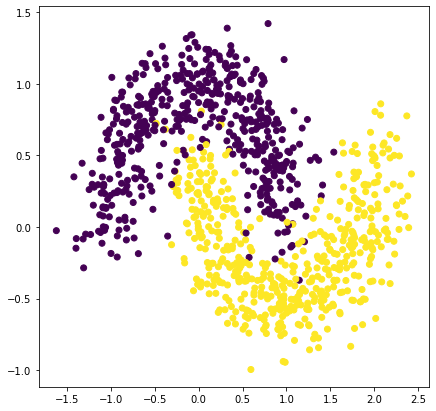

In [143]:
df = datasets.make_moons(n_samples=1000, noise=0.2, random_state=2)
df_x = [x[0] for x in df[0]]
df_y = [x[1] for x in df[0]]
df_group = df[1]

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df_x, df_y, c=df_group)

In [144]:
df_pd = pd.DataFrame(list(zip(df_x, df_y, df_group)), columns=['x', 'y', 'group'])
X_train, X_test, y_train, y_test = train_test_split(df_pd[['x', 'y']], df_pd['group'], test_size=0.2, stratify=df_pd['group'])

In [145]:
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import ListedColormap


x_min, x_max = df_pd['x'].min()-0.1, df_pd['x'].max()+0.1
y_min, y_max = df_pd['y'].min()-0.1, df_pd['y'].max()+0.1  

def plot_decision_boundaries(x, y, labels, model, 
                             x_min=x_min, 
                             x_max=x_max, 
                             y_min=y_min, 
                             y_max=y_max, 
                             grid_step=0.02):
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))
    
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]

    Z = Z.reshape(xx.shape)

    arr = plt.cm.coolwarm(np.arange(plt.cm.coolwarm.N))
    arr_hsv = mpl.colors.rgb_to_hsv(arr[:,0:3])
    arr_hsv[:,2] = arr_hsv[:,2] * 1.5
    arr_hsv[:,1] = arr_hsv[:,1] * .5
    arr_hsv = np.clip(arr_hsv, 0, 1)
    arr[:,0:3] = mpl.colors.hsv_to_rgb(arr_hsv) 
    my_cmap = ListedColormap(arr)
    
    fig, ax = plt.subplots(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=my_cmap)

    ax.scatter(x, y, c=labels, cmap='coolwarm')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.grid(False)

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
X_blobs, y_blobs = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, scale=.4, class_sep=1.5, random_state=2)

/tmp/ipykernel_1981/1063131263.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


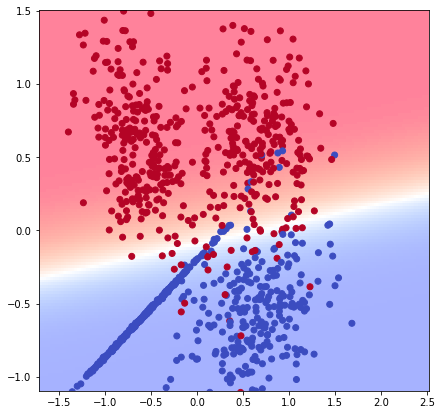

In [148]:
lr = LogisticRegression(penalty='none')
lr.fit(X_blobs, y_blobs)

plot_decision_boundaries(X_blobs[:,0], X_blobs[:,1], y_blobs, lr)

In [149]:
lr.predict_proba(X_blobs)

array([[9.55384273e-01, 4.46157268e-02],
       [3.74337723e-03, 9.96256623e-01],
       [9.92921288e-01, 7.07871191e-03],
       ...,
       [2.14816891e-01, 7.85183109e-01],
       [1.23056351e-03, 9.98769436e-01],
       [5.59989101e-04, 9.99440011e-01]])

In [150]:
metrics.confusion_matrix(y_blobs, lr.predict(X_blobs))

NameError: name 'metrics' is not defined

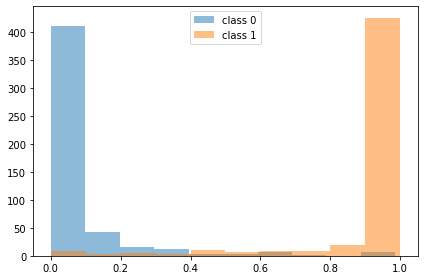

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(lr.predict_proba(X_blobs)[y_blobs == 0, 1], label='class 0', alpha=.5)
ax.hist(lr.predict_proba(X_blobs)[y_blobs == 1, 1], label='class 1', alpha=.5)
ax.legend()
plt.tight_layout()

In [ ]:
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.4, noise=.1, random_state=1)

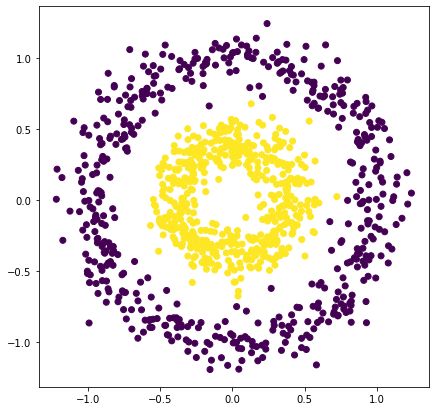

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_circles[:,0], X_circles[:,1], c=y_circles)

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


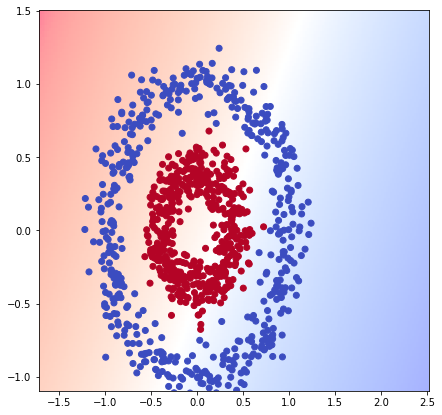

In [ ]:
lr = LogisticRegression(penalty='none')
lr.fit(X_circles, y_circles)

plot_decision_boundaries(X_circles[:,0], X_circles[:,1], y_circles, lr)

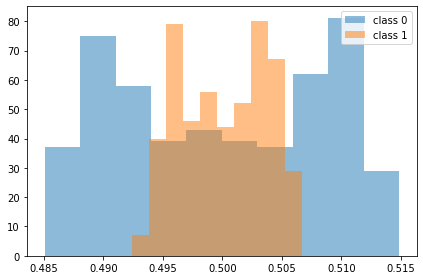

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(lr.predict_proba(X_circles)[y_circles == 0, 1], label='class 0', alpha=.5)
ax.hist(lr.predict_proba(X_circles)[y_circles == 1, 1], label='class 1', alpha=.5)
ax.legend()
plt.tight_layout()

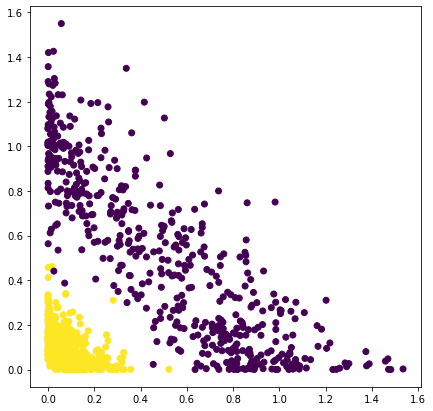

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(X_circles[:,0] ** 2, X_circles[:,1] ** 2, c=y_circles)

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


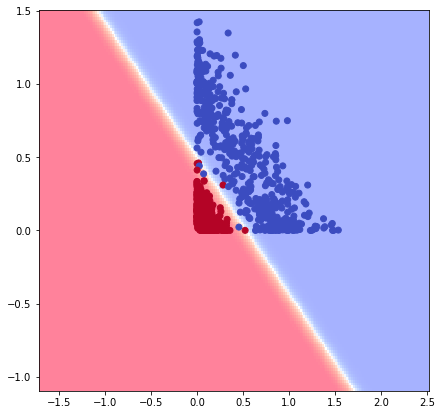

In [ ]:
lr = LogisticRegression(penalty='none')
lr.fit(X_circles ** 2, y_circles)

plot_decision_boundaries(X_circles[:,0] ** 2, X_circles[:,1] ** 2, y_circles, lr)

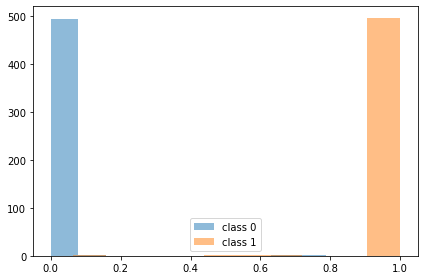

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(lr.predict_proba(X_circles ** 2)[y_circles == 0, 1], label='class 0', alpha=.5)
ax.hist(lr.predict_proba(X_circles ** 2)[y_circles == 1, 1], label='class 1', alpha=.5)
ax.legend()
plt.tight_layout()

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


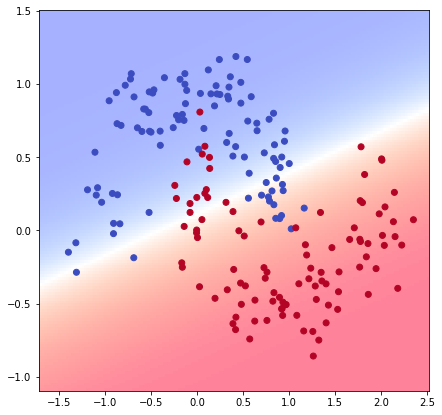

In [ ]:
lr = LogisticRegression(penalty='none')
lr.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, lr)

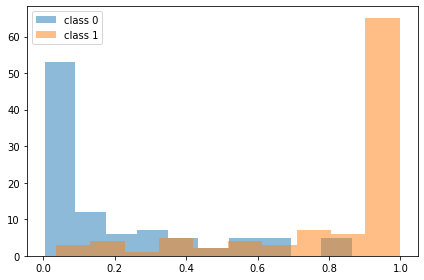

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(lr.predict_proba(X_test)[y_test == 0, 1], label='class 0', alpha=.5)
ax.hist(lr.predict_proba(X_test)[y_test == 1, 1], label='class 1', alpha=.5)
ax.legend()
plt.tight_layout()

In [ ]:
metrics.confusion_matrix(y_test, lr.predict_proba(X_test)[:,1] > .5)

array([[85, 15],
       [14, 86]])

In [ ]:
metrics.confusion_matrix(y_test, lr.predict_proba(X_test)[:,1] > .2)

array([[67, 33],
       [ 5, 95]])

In [ ]:
metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.9458000000000001

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


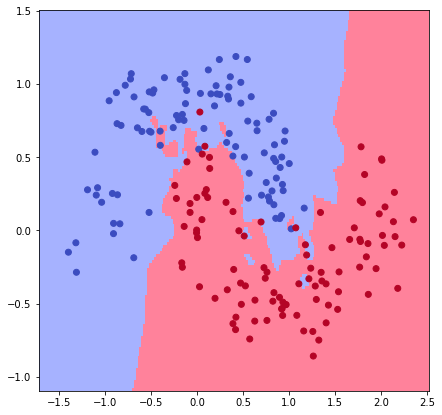

In [ ]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, kn)

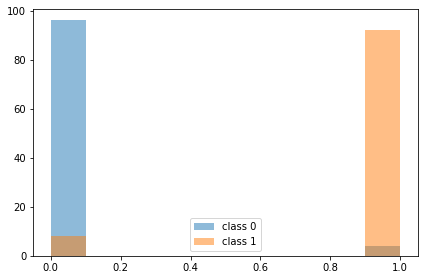

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(kn.predict_proba(X_test)[y_test == 0, 1], label='class 0', alpha=.5)
ax.hist(kn.predict_proba(X_test)[y_test == 1, 1], label='class 1', alpha=.5)
ax.legend()
plt.tight_layout()

In [ ]:
metrics.roc_auc_score(y_test, kn.predict_proba(X_test)[:,1])

0.94

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


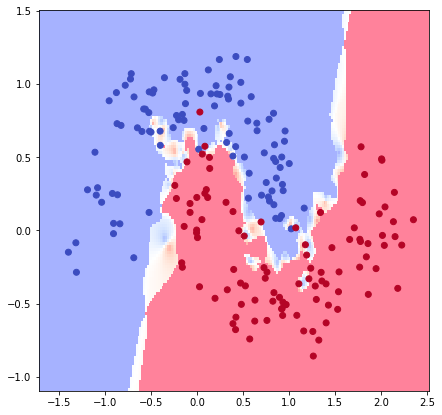

In [ ]:
kn = KNeighborsClassifier(n_neighbors=2, weights='distance')
kn.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, kn)

In [ ]:
metrics.roc_auc_score(y_test, kn.predict_proba(X_test)[:,1])

0.995

In [ ]:
clf = KNeighborsClassifier()
            
param_grid = {"n_neighbors": range(1, 30, 2), "weights": ["uniform", "distance"]}

gs = model_selection.GridSearchCV(clf, param_grid=param_grid, cv=4, scoring='roc_auc')

gs.fit(X_train, y_train)

means = gs.cv_results_["mean_test_score"]
stds = gs.cv_results_["std_test_score"]
params = gs.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Mean: {:.2f} ± {:.2f} params: {}".format(mean*100, std*100, pms))

Mean: 95.50 ± 0.79 params: {'n_neighbors': 1, 'weights': 'uniform'}
Mean: 95.50 ± 0.79 params: {'n_neighbors': 1, 'weights': 'distance'}
Mean: 98.27 ± 0.66 params: {'n_neighbors': 3, 'weights': 'uniform'}
Mean: 98.29 ± 0.62 params: {'n_neighbors': 3, 'weights': 'distance'}
Mean: 98.80 ± 0.43 params: {'n_neighbors': 5, 'weights': 'uniform'}
Mean: 98.77 ± 0.40 params: {'n_neighbors': 5, 'weights': 'distance'}
Mean: 99.03 ± 0.29 params: {'n_neighbors': 7, 'weights': 'uniform'}
Mean: 98.99 ± 0.27 params: {'n_neighbors': 7, 'weights': 'distance'}
Mean: 99.25 ± 0.27 params: {'n_neighbors': 9, 'weights': 'uniform'}
Mean: 99.21 ± 0.28 params: {'n_neighbors': 9, 'weights': 'distance'}
Mean: 99.26 ± 0.26 params: {'n_neighbors': 11, 'weights': 'uniform'}
Mean: 99.23 ± 0.29 params: {'n_neighbors': 11, 'weights': 'distance'}
Mean: 99.34 ± 0.14 params: {'n_neighbors': 13, 'weights': 'uniform'}
Mean: 99.33 ± 0.18 params: {'n_neighbors': 13, 'weights': 'distance'}
Mean: 99.45 ± 0.26 params: {'n_neighb

<AxesSubplot:xlabel='weights', ylabel='n_neighbors'>

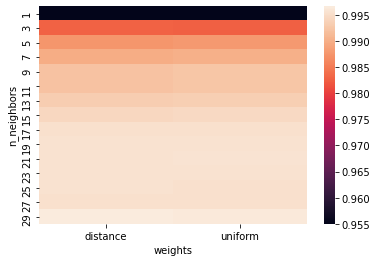

In [ ]:
param1 = [x['n_neighbors'] for x in params]
param2 = [x['weights'] for x in params]

precisions = pd.DataFrame(zip(param1, param2, means), columns=['n_neighbors', 'weights', 'means'])
precisions = precisions.pivot('n_neighbors', 'weights', 'means')
sns.heatmap(precisions)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


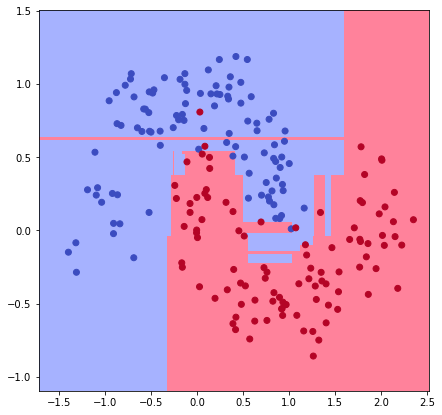

In [ ]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, dt)

Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 1}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 2}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 3}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 4}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 5}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 7}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 10}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 15}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 20}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 25}
Mean: 80.88 ± 1.24 params: {'max_depth': 1, 'min_samples_leaf': 30}
Mean: 91.02 ± 0.32 params: {'max_depth': 2, 'min_samples_leaf': 1}
Mean: 91.02 ± 0.32 params: {'max_depth': 2, 'min_samples_leaf': 2}
Mean: 91.02 ± 0.32 params: {'max_depth': 2, 'min_samples_leaf': 3}
Mean: 91.02 ± 0.32 params: {'max_depth': 2, 'min_samples_

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


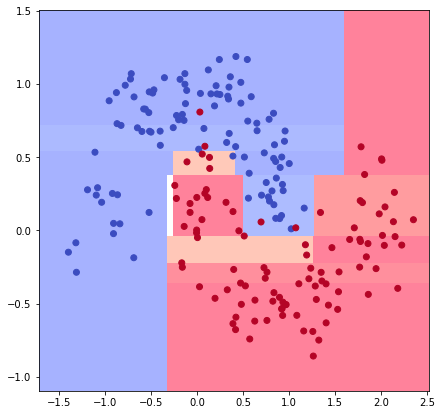

In [ ]:
clf = DecisionTreeClassifier()

param_grid = {"max_depth": [1, 2, 3, 4, 5, 7, 10, 15, 20], "min_samples_leaf": [1, 2, 3, 4, 5, 7, 10, 15, 20, 25, 30]}

gs = model_selection.GridSearchCV(clf, param_grid=param_grid, cv=4, scoring='roc_auc')

gs.fit(X_train, y_train)

means = gs.cv_results_["mean_test_score"]
stds = gs.cv_results_["std_test_score"]
params = gs.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Mean: {:.2f} ± {:.2f} params: {}".format(mean*100, std*100, pms))

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, gs.best_estimator_)

In [ ]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 2}

In [ ]:
from sklearn.svm import SVC

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


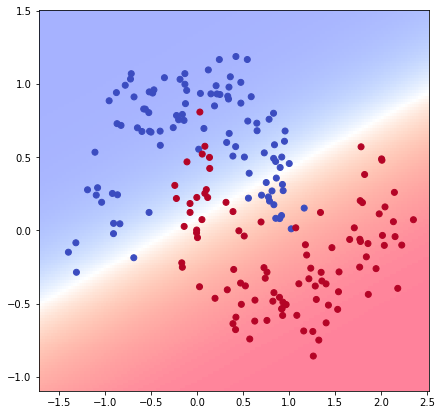

In [ ]:
sv = SVC(probability=True, kernel='linear')
sv.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, sv)

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


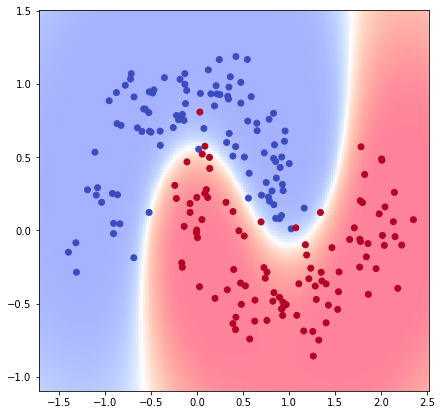

In [ ]:
sv = SVC(probability=True, kernel='rbf')
sv.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, sv)

In [ ]:
from sklearn import ensemble

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    lr = LogisticRegression(penalty='none', max_iter=1).fit(X_train, y_train)
    
wl0_y_train = lr.predict_proba(X_train)[:,1].reshape(-1, 1)
wl0_y_test = lr.predict_proba(X_test)[:,1].reshape(-1, 1)
    
metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.9055

In [ ]:
sv = SVC(probability=True, kernel='poly', degree=2).fit(X_train, y_train)

wl1_y_train = sv.predict_proba(X_train)[:,1].reshape(-1, 1)
wl1_y_test = sv.predict_proba(X_test)[:,1].reshape(-1, 1)

metrics.roc_auc_score(y_test, sv.predict_proba(X_test)[:,1])

0.829

In [ ]:
dt = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

wl2_y_train = dt.predict_proba(X_train)[:,1].reshape(-1, 1)
wl2_y_test = dt.predict_proba(X_test)[:,1].reshape(-1, 1)

metrics.roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])

0.90145

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


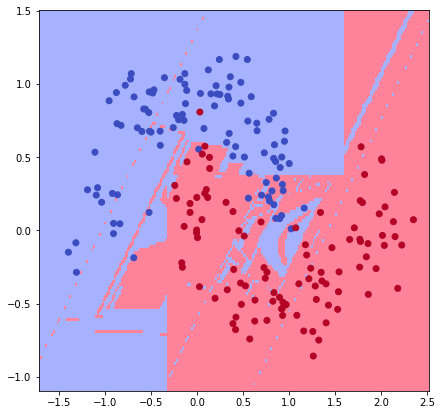

In [ ]:
estimators = [
    ('lr', LogisticRegression(penalty='none', max_iter=1)),
    ('sv', SVC(probability=True, kernel='poly', degree=2)),
    ('dt', DecisionTreeClassifier(max_depth=2))
]

clf = ensemble.StackingClassifier(
    estimators=estimators, final_estimator=DecisionTreeClassifier()
)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    clf.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, clf)

In [ ]:
metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9199999999999999

In [ ]:
X_train_casc = np.hstack([X_train, wl0_y_train, wl1_y_train, wl2_y_train])
X_test_casc = np.hstack([X_test, wl0_y_test, wl1_y_test, wl2_y_test])

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_casc, y_train)

metrics.roc_auc_score(y_test, dt.predict_proba(X_test_casc)[:,1])

0.96

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


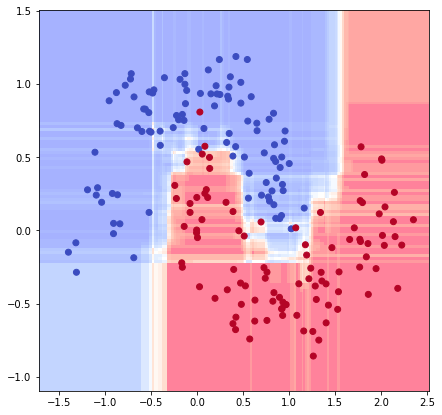

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators=30)
rf.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, rf)

<ipython-input-274-18f4e339acee>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=my_cmap)


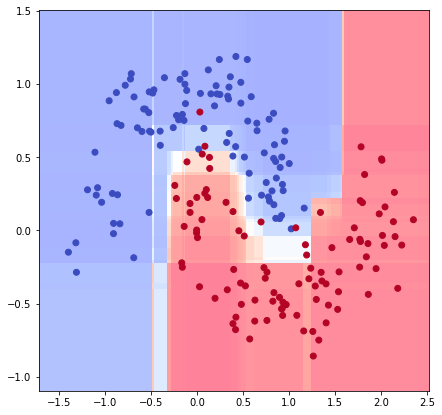

In [ ]:
gb = ensemble.GradientBoostingClassifier(n_estimators=50)
gb.fit(X_train, y_train)

plot_decision_boundaries(X_test['x'], X_test['y'], y_test, gb)